In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
pip install notebook nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.8 MB/s eta 0:00:00
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36081 sha256=f0f78f00069d3d93e7c737fd050357382a045a29303d66089728167631add1a4
  Stored in directory: /root/.cache/pip/wheels/50/12/d5/bbea58569f0c28fa7a6cb72cc76303ecd20d40c977742486df
Successfully built nsepy


In [ ]:
# import require library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from datetime import datetime
from pandas_datareader import data as pdr

#Web scraping of nse.
from datetime import date
from nsepy import get_history
import pickle

In [ ]:
URL = 'https://www1.nseindia.com/content/indices/ind_niftyenergylist.csv'
df = pd.read_csv(URL, index_col = 'Company Name')

#web scraping of Adanigreen
symbol = "ADANIGREEN"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
adanigreen = get_history(symbol=symbol, start=start, end=end)

#web scraping of ADANITRANS
symbol = "ADANITRANS"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
adanitrans = get_history(symbol=symbol, start=start, end=end)

#web scraping of RELIANCE
symbol = "RELIANCE"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
reliance = get_history(symbol=symbol, start=start, end=end)

Training data size : (874, 17)
Testing data size : (219, 17)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/zu5ay9q7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/wpxsjxiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57977', 'data', 'file=/tmp/tmp71ij6fov/zu5ay9q7.json', 'init=/tmp/tmp71ij6fov/wpxsjxiv.json', 'output', 'file=/tmp/tmp71ij6fov/prophet_modellvd87ciw/prophet_model-20230319143601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


17966.263378995434
Accuracy of the model is : 93.13329718824134


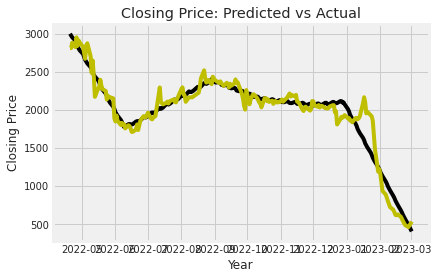

In [ ]:
df_adanigreen=adanigreen.reset_index()

df_adanigreen[["ds","y"]]=df_adanigreen[["Date","Close"]]

train_set_adanigreen, test_set_adanigreen= np.split(df_adanigreen, [int(.8 *len(df_adanigreen))])
print(f'Training data size : {train_set_adanigreen.shape}')
print(f'Testing data size : {test_set_adanigreen.shape}')

from sklearn.metrics import mean_squared_error,accuracy_score

model=Prophet(growth="linear",daily_seasonality=True,seasonality_mode="multiplicative")
model.fit(test_set_adanigreen)
y_actual=test_set_adanigreen["y"]
prediction=model.predict(pd.DataFrame({"ds":test_set_adanigreen["ds"]}))
y_predicted=prediction["yhat"]
y_predicted=y_predicted.astype(int)
print(mean_squared_error(y_actual,y_predicted))


from sklearn.metrics import r2_score
r2_score(y_actual,y_predicted)
print("Accuracy of the model is :",100*r2_score(y_actual,y_predicted))

plt.plot(test_set_adanigreen['ds'], y_predicted, 'k')
plt.plot(test_set_adanigreen['ds'], y_actual, 'y')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price: Predicted vs Actual")
plt.show()

In [ ]:
model = Prophet()                                                               
model.fit(df_adanigreen)                                              
future = model.make_future_dataframe(365)
forecast = model.predict(future)  
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/qml1sq3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/g82qtn5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16732', 'data', 'file=/tmp/tmp71ij6fov/qml1sq3r.json', 'init=/tmp/tmp71ij6fov/g82qtn5g.json', 'output', 'file=/tmp/tmp71ij6fov/prophet_modeljlcaf3vb/prophet_model-20230319143602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1093,2023-03-03,1404.261139,1164.777167,1637.013461
1094,2023-03-04,1495.138640,1253.135202,1740.365182
1095,2023-03-05,1394.326931,1176.688219,1623.832423
1096,2023-03-06,1422.865752,1178.336353,1655.940270
1097,2023-03-07,1430.641224,1178.753543,1650.849325
...,...,...,...,...
1453,2024-02-26,412.677114,-286.328943,1069.025962
1454,2024-02-27,422.128507,-317.349633,1071.330408
1455,2024-02-28,425.021408,-279.030455,1068.057786
1456,2024-02-29,432.298508,-244.212442,1082.171218


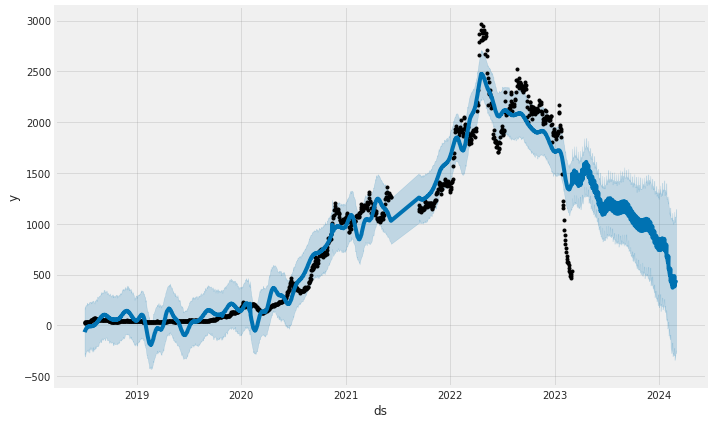

In [ ]:
model.plot(forecast)
plt.show()   

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/k5752mi_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/cnf7dn8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82311', 'data', 'file=/tmp/tmp71ij6fov/k5752mi_.json', 'init=/tmp/tmp71ij6fov/cnf7dn8c.json', 'output', 'file=/tmp/tmp71ij6fov/prophet_modelw6gbimlx/prophet_model-20230319143604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training data size : (926, 17)
Testing data size : (232, 17)


14:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1990.7488469827588
Accuracy of the model is : 85.61818200748756


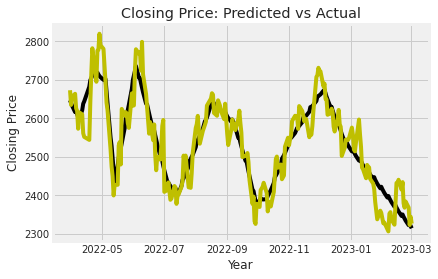

In [ ]:
df_reliance=reliance.reset_index()

df_reliance[["ds","y"]]=df_reliance[["Date","Close"]]

train_set_reliance, test_set_reliance= np.split(df_reliance, [int(.8 *len(df_reliance))])
print(f'Training data size : {train_set_reliance.shape}')
print(f'Testing data size : {test_set_reliance.shape}')

model=Prophet(growth="linear",daily_seasonality=True,seasonality_mode="multiplicative")
model.fit(test_set_reliance)
y_actual=test_set_reliance["y"]
prediction=model.predict(pd.DataFrame({"ds":test_set_reliance["ds"]}))
y_predicted=prediction["yhat"]
y_predicted=y_predicted.astype(int)
print(mean_squared_error(y_actual,y_predicted))

from sklearn.metrics import r2_score
r2_score(y_actual,y_predicted)
print("Accuracy of the model is :",100*r2_score(y_actual,y_predicted))

plt.plot(test_set_reliance['ds'], y_predicted, 'k')
plt.plot(test_set_reliance['ds'], y_actual, 'y')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price: Predicted vs Actual")
plt.show()

In [ ]:
model = Prophet()                                                               
model.fit(df_reliance)                                              
future = model.make_future_dataframe(365)
forecast = model.predict(future)  
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/191ijl96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/h_ifclih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29652', 'data', 'file=/tmp/tmp71ij6fov/191ijl96.json', 'init=/tmp/tmp71ij6fov/h_ifclih.json', 'output', 'file=/tmp/tmp71ij6fov/prophet_modelvmilljwb/prophet_model-20230319143606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1158,2023-03-03,2379.188920,2233.333209,2528.260538
1159,2023-03-04,2356.991281,2202.264947,2506.137703
1160,2023-03-05,2386.822737,2241.491870,2541.075659
1161,2023-03-06,2362.869112,2212.695205,2506.737861
1162,2023-03-07,2364.513686,2220.035156,2509.012948
...,...,...,...,...
1518,2024-02-26,2258.506328,1844.704802,2662.654828
1519,2024-02-27,2260.651235,1832.345601,2682.178349
1520,2024-02-28,2256.164048,1846.106527,2659.559864
1521,2024-02-29,2250.719885,1804.184222,2666.254849


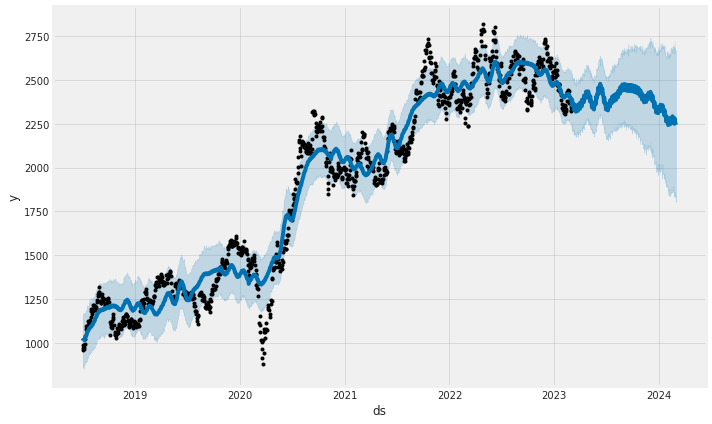

In [ ]:
model.plot(forecast)
plt.show()   

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/w4iuz5ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/myyon49c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18976', 'data', 'file=/tmp/tmp71ij6fov/w4iuz5ig.json', 'init=/tmp/tmp71ij6fov/myyon49c.json', 'output', 'file=/tmp/tmp71ij6fov/prophet_model7sebe2ti/prophet_model-20230319143607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training data size : (778, 17)
Testing data size : (195, 17)


14:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


20772.998794871794
Accuracy of the model is : 96.95973414902888


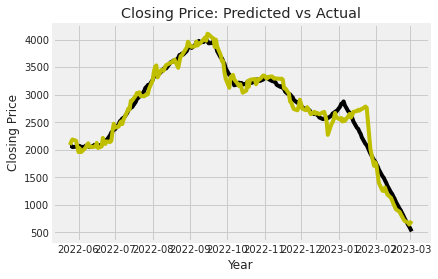

In [ ]:
df_adanitrans=adanitrans.reset_index()

df_adanitrans[["ds","y"]]=df_adanitrans[["Date","Close"]]

train_set_adanitrans, test_set_adanitrans= np.split(df_adanitrans, [int(.8 *len(df_adanitrans))])
print(f'Training data size : {train_set_adanitrans.shape}')
print(f'Testing data size : {test_set_adanitrans.shape}')

model=Prophet(growth="linear",daily_seasonality=True,seasonality_mode="multiplicative")
model.fit(test_set_adanitrans)
y_actual=test_set_adanitrans["y"]
prediction=model.predict(pd.DataFrame({"ds":test_set_adanitrans["ds"]}))
y_predicted=prediction["yhat"]
y_predicted=y_predicted.astype(int)
print(mean_squared_error(y_actual,y_predicted))

from sklearn.metrics import r2_score
r2_score(y_actual,y_predicted)
print("Accuracy of the model is :",100*r2_score(y_actual,y_predicted))

plt.plot(test_set_adanitrans['ds'], y_predicted, 'k')
plt.plot(test_set_adanitrans['ds'], y_actual, 'y')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price: Predicted vs Actual")
plt.show()

In [ ]:
model = Prophet()                                                               
model.fit(df_adanitrans)                                              
future = model.make_future_dataframe(365)
forecast = model.predict(future)  
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/uzb7eyqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71ij6fov/17e0f9ka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75546', 'data', 'file=/tmp/tmp71ij6fov/uzb7eyqb.json', 'init=/tmp/tmp71ij6fov/17e0f9ka.json', 'output', 'file=/tmp/tmp71ij6fov/prophet_model3tmqhlr_/prophet_model-20230319143608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
973,2023-03-03,2186.512968,1806.162108,2583.586964
974,2023-03-04,2250.032791,1821.461975,2650.097854
975,2023-03-05,2047.221888,1634.177175,2451.192281
976,2023-03-06,2243.911693,1861.451502,2641.680774
977,2023-03-07,2263.914298,1872.310262,2725.565569
...,...,...,...,...
1333,2024-02-26,1658.826840,1106.681324,2237.693018
1334,2024-02-27,1676.070669,1138.080157,2198.545413
1335,2024-02-28,1682.003584,1131.922700,2240.728871
1336,2024-02-29,1715.082538,1126.142254,2287.524858


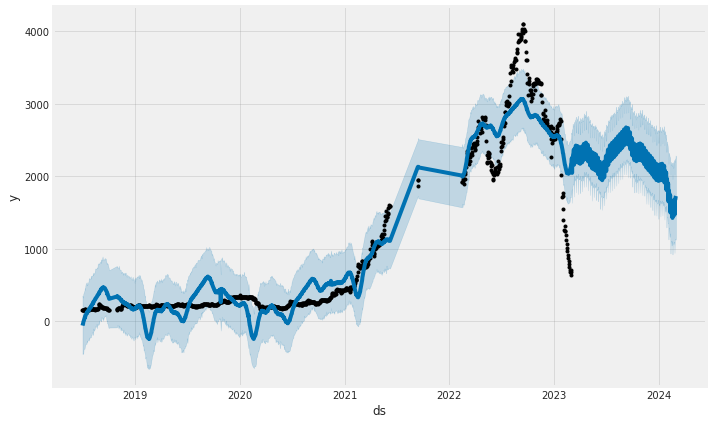

In [ ]:
model.plot(forecast)
plt.show()   